Name: Parham Rezaei
</br>
Student ID: 400108547

**Part 1**

 Write two functions named "camera_matrix" and "camera_projection". The first one gets all the camera parameters, containing λ, f (focal length), Sx, Sy, Sθ, Ox, Oy, R, T, and returns the camera matrix (Please provide comments above each stage of transformation). The second function projects a given 3D point on image and returns a 2D point in pixel coordinates.

In [1]:
import numpy as np

In [29]:
def camera_matrix(landa, f, Sx, Sy, S_theta, Ox, Oy, R, T):
    # rotate and translate matrix
    worldtocamera = np.array([[R[0][0], R[0][1], R[0][2], T[0]], [R[1][0], R[1][1], R[1][2], T[1]], [R[2][0], R[2][1], R[2][2], T[2]], [0, 0, 0, 1]])
    
    # extrinsic parameters
    Kf = np.array([[f, 0, 0], [0, f, 0], [0, 0, 1]])
    # intrinsic parameters
    Ks = np.array([[Sx, S_theta, Ox], [0, Sy, Oy], [0, 0, 1]])
    # project
    pi0 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0,0,1,0]])
    # position
    pos = np.matmul(pi0, worldtocamera)
    # pinhole camera model
    matx = np.matmul(Kf, pos)*landa
    # pixel coordinates
    mats = np.matmul(Ks, matx)
    
    return mats

def camera_projection(X, Y, Z, matrix):

    coord = np.array([[X], [Y], [Z], [1]])
    project = np.matmul(matrix, coord)
    
    project = project/project[-1]
    # removing last element
    project = project[:-1].flatten()
    return project



**Part 2**

Consider a pinhole camera with center located at (1, 1, -3), which its focal length is 100, scale factors (Sx, Sy) are both 1 and pixel coordinates of principal point is (50, 50). Also skew parameter is zero. The angle of the camera is such that the optical axis of the camera is parallel to the z axis. Using the previous function obtain the whole camera matrix.

In [30]:

R = np.identity(3)
T = np.array([-1,-1,3])
cameraMatrix = camera_matrix(1, 100, 1, 1, 0, 50, 50, R, T)
print(cameraMatrix)



[[100.   0.  50.  50.]
 [  0. 100.  50.  50.]
 [  0.   0.   1.   3.]]


**Part 3**

Suppose that vector V: (0, 1, 1) is located at (1, 1, 3) in 3D space. Apply the obtained camera matrix to V. Plot the result in pixel coordinates in a 2D plot. From which step of projection the length of the vector changes?

(50.0,50.0) to (50.0,64.28571428571429)


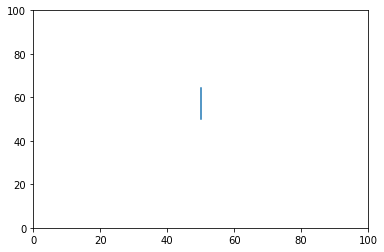

In [33]:

Vbegin = np.array([1,1,3])
Vend = np.array([1,2,4])
projbegin = camera_projection(Vbegin[0], Vbegin[1], Vbegin[2], cameraMatrix)
projend = camera_projection(Vend[0], Vend[1], Vend[2], cameraMatrix)
# plot
import matplotlib.pyplot as plt
print(f"({projbegin[0]},{projbegin[1]}) to ({projend[0]},{projend[1]})")
plt.plot([projbegin[0], projend[0]], [projbegin[1], projend[1]])
plt.axis([0,100,0,100])
plt.show()


تا مرحله شیفت و روتیشن اندازه بردار تغییری نمیکند اما پس از آن داریم که مقدار فاصله فوکال دارد ضرب می شود که موجب می شود اندازه جفت بردارها تغییر کند که به موجب آن به همان نسبت طول بردار نیز دارد تغییر می کند. همچنین از این استپ به بعد دیگر چون تبدیل ها یا افاین یا پروجکتیو اند دیگر اندازه ثابت نمی ماند.
چون افاین لزوما زوایا و فاصله نقاط را حفظ نمی کند. 

In [26]:
# let's test my claim with some code
vb = np.array([1,1,3,1])
ve = np.array([1,2,4,1])
length1 = np.linalg.norm(ve-vb)
u = np.array([[R[0][0], R[0][1], R[0][2], T[0]], [R[1][0], R[1][1], R[1][2], T[1]], [R[2][0], R[2][1], R[2][2], T[2]], [0, 0, 0, 1]])
vb = np.matmul(u,vb)
ve = np.matmul(u,ve)
length2 = np.linalg.norm(ve-vb)
u = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0,0,1,0]])
vb = np.matmul(u,vb)
ve = np.matmul(u,ve)
length3 = np.linalg.norm(ve-vb)
u = np.array([[100, 0, 0], [0, 100, 0], [0, 0, 1]])
vb = np.matmul(u,vb)
ve = np.matmul(u,ve)
length4 = np.linalg.norm(ve-vb)
u = np.array([[1, 0, 50], [0, 1, 50], [0, 0, 1]])
vb = np.matmul(u,vb)
ve = np.matmul(u,ve)
length5 = np.linalg.norm(ve-vb)
print(f"beginning length: \033[92m{length1}\033[0m\nafter rotation and shift: \033[92m{length2}\033[0m\nafter pi0: \033[92m{length3}\033[0m \
      \nafter Kf: \033[91m{length4}\033[0m\nafter Ks: \033[93m{length5}\033[0m")

beginning length: 1.4142135623730951
after rotation and shift: 1.4142135623730951
after pi0: 1.4142135623730951       
after Kf: 100.00499987500625
after Ks: 158.117045254457


مشاهده میکنیم تا زمان ضرب ماتریس های آر و تی و سپس ضرب پی صفر برای تبدیل از 
</br>
$\mathbb{R^{4*1}}$
</br>
به
</br>
$\mathbb{R^{3*1}}$
</br>
داریم که اندازه تغییر نمیکند ولی از مرحله ضرب
</br>
$K_f$
</br>
.هربار اندازه تغییر میکند


**Part 4**

If the camera is rotated by +25 degrees around x axis, how would R and T change? What would the final image be?

(50.0,27.830533735706002) to (50.0,38.24896229424159)


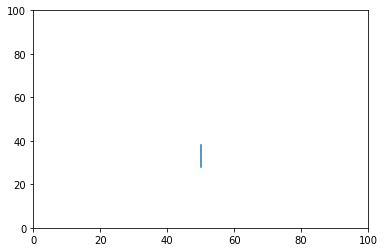

In [32]:
# T is the same
R = np.array([[1, 0, 0], [0, np.cos(np.pi/180*25), -np.sin(np.pi/180*25)], [0, np.sin(np.pi/180*25), np.cos(np.pi/180*25)]])
camera = camera_matrix(1, 100, 1, 1, 0, 50, 50, R, T)

projbegin = camera_projection(Vbegin[0], Vbegin[1], Vbegin[2], camera)
projend = camera_projection(Vend[0], Vend[1], Vend[2], camera)
# plot
print(f"({projbegin[0]},{projbegin[1]}) to ({projend[0]},{projend[1]})")
plt.plot([projbegin[0], projend[0]], [projbegin[1], projend[1]])
plt.axis([0,100,0,100])
plt.show()